Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.

Whose woods these are I think I know.   
His house is in the village though;   
He will not see me stopping here   
To watch his woods fill up with snow.   

My little horse must think it queer   
To stop without a farmhouse near   
Between the woods and frozen lake   

Epoch 1/100
38/38 [==============================] - 27s 483ms/step - loss: 6.1292 - accuracy: 0.0367
Epoch 2/100
38/38 [==============================] - 16s 423ms/step - loss: 5.8096 - accuracy: 0.0467
Epoch 3/100
38/38 [==============================] - 17s 444ms/step - loss: 5.7534 - accuracy: 0.0376
Epoch 4/100
38/38 [==============================] - 19s 510ms/step - loss: 5.7297 - accuracy: 0.0451
Epoch 5/100
38/38 [==============================] - 20s 526ms/step - loss: 5.6978 - accuracy: 0.0392
Epoch 6/100
38/38 [==============================] - 20s 533ms/step - loss: 5.6592 - accuracy: 0.0401
Epoch 7/100
38/38 [==============================] - 19s 496ms/step - loss: 5.5014 - accuracy: 0.0467
Epoch 8/100
38/38 [==============================] - 17s 447ms/step - loss: 5.3250 - accuracy: 0.0518
Epoch 9/100
38/38 [==============================] - 17s 445ms/step - loss: 5.2026 - accuracy: 0.0509
Epoch 10/100
38/38 [==============================] - 19s 489ms/step - loss: 5.091

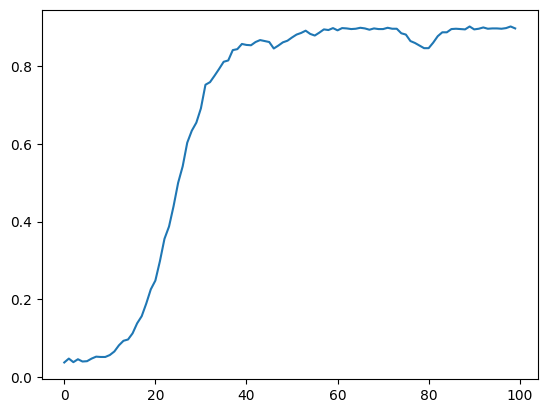

In [6]:
# -*- coding: utf-8 -*-
"""Poem text generator.ipynb

Automatically generated by Colaboratory.

# Text Generation using LSTM

##Two types of text generation


1.   Character based text generation
* Each character of the text is used to train the model and prediction will also result in generation of new characters. 

2.   Word based text generation
* Words are converted into tokens which are used to train the model. The model will generate words instead of characters in the prediction stage.

## Mechanics of the text generation model: 

1. The next word of the sequence is predicted using the words that are already present in the sequence. 

2. It is a simple model where splitting the data into training and testing sets is not required. This is because the model will use all the words in the sequence to predict the next word. Just like forecasting.

#The flow of program:

1. Loading data
2. Preprocessing the data and Tokenizing 
3. Building and fitting the model on data
4. Evaluate the model
5. Predicting(Generating the text)
6. Saving the model for future applicaitons
"""


import tensorflow as tf
import pandas as pd
import numpy as np

# reading the data from local google drive 
# with open('robert_frost.txt') as story:
#   story_data = story.read().decode(encoding='utf-8')

story_data = open('robert_frost.txt', 'rb').read().decode(encoding='utf-8') #New buy mee

print(story_data)

# data cleaning process
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)                         

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

"""## Creating n-gram sequences from the sentences

* Consider this sentence : ['two roads diverged in a yellow wood']. Here we will use ['two roads diverged in a yellow'] to predict ['wood']. This is the basic concept of forecasting which can be applied here to generate text.

* An advacement of this will be to use single word or every combination words possible from the sentence to predict the next word. And this is loosely termed as n_gram sequences

* The sentence ['two roads diverged in a yellow wood'] will have sequence as [112, 113, 114, 7, 5, 190, 75]

* so we will use combinations of words to make our model better

* [112, 113], 
* [112, 113, 114], 
* [112, 113, 114, 7], 
* [112, 113, 114, 7, 5], 
* [112, 113, 114, 7, 5, 190], 
* [112, 113, 114, 7, 5, 190, 75]

* we train our model that if 112 comes then it has to predict 113.
* if combination of 112, 113, comes then it has to predict 114 and so on.
"""

# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

# using the pipeline method of sequential to define a model

# model = Sequential()
# model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
# model.add(Dropout(0.2))
# model.add(LSTM(520, return_sequences=True))
# model.add(Bidirectional(LSTM(340, return_sequences=True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])   ## New je change 'lr' en "learning_rate"

# model.summary()                                       # We can know about the shape of the model

r = model.fit(xs,ys,epochs=100)
# r = model.fit(xs,ys,epochs=10)


# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

# Defining a function to take input of seed text from user and no. of words to be predicted

def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

# predicting or generating the poem with the seed text

seed_text = 'i am feeling good today'
next_words = 20

predict_words(seed_text, next_words)

# saving the model

model.save('poem_generator.h5') # Will create a HDF5 file of the model

In [7]:
seed_text = 'two roads diverged'
next_words = 20

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 37ms/step
two roads diverged in a yellow wood away i— sell their bowed his moon again said a few again said the few again


In [1]:
####### Tutos et projet net #######

import random
import numpy as np
import tensorflow as tf

####### Meme sans connexion le jeu de donnée est acccessible #######

filepath = tf.keras.utils.get_file('shakespeare.txt',
        'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
text = open(filepath, 'rb').read().decode(encoding='utf-8')

text = open(filepath, 'rb').read().decode(encoding='utf-8').lower()



#text = open('shakespeare.txt', 'rb').read().decode(encoding='utf-8')  # New change by mee but i don't want to download dataset anyway when i'want to execute this code

#text = open('shakespeare.txt', 'rb').read().decode(encoding='utf-8').lower()  # New change by mee but i don't want to download dataset anyway when i'want to execute this code


text = text[300000:800000]

characters = sorted(set(text))

char_to_index = dict((c, i) for i, c in enumerate(characters))
index_to_char = dict((i, c) for i, c in enumerate(characters))

SEQ_LENGTH = 40
STEP_SIZE = 3

sentences = []
next_char = []

for i in range(0, len(text) - SEQ_LENGTH, STEP_SIZE):
    sentences.append(text[i: i + SEQ_LENGTH])
    next_char.append(text[i + SEQ_LENGTH])



x = np.zeros((len(sentences), SEQ_LENGTH,
              len(characters)), dtype=np.bool)
y = np.zeros((len(sentences),
              len(characters)), dtype=np.bool)

for i, satz in enumerate(sentences):
    for t, char in enumerate(satz):
        x[i, t, char_to_index[char]] = 1
    y[i, char_to_index[next_char[i]]] = 1


import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Activation, Dense, LSTM

model = Sequential()
model.add(LSTM(128,
               input_shape=(SEQ_LENGTH,
                            len(characters)))) ### New je change 128 en 520 "Mais l'entrainement devient  10 fois plus lent"
model.add(Dense(len(characters)))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01)) ## New je change 'lr' en "learning_rate"

model.fit(x, y, batch_size=256, epochs=4)


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_text(length, temperature):
    start_index = random.randint(0, len(text) - SEQ_LENGTH - 1)
    generated = ''
    sentence = text[start_index: start_index + SEQ_LENGTH]
    generated += sentence
    for i in range(length):
        x_predictions = np.zeros((1, SEQ_LENGTH, len(characters)))
        for t, char in enumerate(sentence):
            x_predictions[0, t, char_to_index[char]] = 1

        predictions = model.predict(x_predictions, verbose=0)[0]
        next_index = sample(predictions,
                                 temperature)
        next_character = index_to_char[next_index]

        generated += next_character
        sentence = sentence[1:] + next_character
    return generated



print(generate_text(300, 0.2))
print(generate_text(300, 0.4))
print(generate_text(300, 0.5))
print(generate_text(300, 0.6))
print(generate_text(300, 0.7))
print(generate_text(300, 0.8))

C:\Users\yvanol fotso\AppData\Local\Temp\ipykernel_9056\2952996871.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  len(characters)), dtype=np.bool)
C:\Users\yvanol fotso\AppData\Local\Temp\ipykernel_9056\2952996871.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  len(characters)), dtype=np.bool)


Epoch 1/4
105/651 [===>..........................] - ETA: 31:29 - loss: 3.1110

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.plot(model.history['val_loss'])

In [ ]:
########## Tutos [thibo73800] Generation des poeme de [Victor Hugo] Trois tutos and youtube and code in github access ########
########## RNN  ############

In [136]:
############################## begin le Tutos ##########################

import tensorflow as tf
import numpy as np

#assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

In [138]:
# You can used your own dataset with english text

with open("victorhugo.txt", "r") as f:
    text = f.read()

print(len(text))

print(text[:1000])

130231
Parce que, jargonnant vÃªpres, jeÃ»ne et vigile,
Exploitant Dieu qui rÃªve au fond du firmament,
Vous avez, au milieu du divin Ã©vangile,
Ouvert boutique effrontÃ©ment ;

Parce que vous feriez prendre Ã  JÃ©sus la verge,
Cyniques brocanteurs sortis on ne sait d'oÃ¹ ;
Parce que vous allez vendant la sainte vierge
Dix sous avec miracle, et sans miracle un sou ;

Parce que vous contez d'effroyables sornettes
Qui font des temples saints trembler les vieux piliers ;
Parce que votre style Ã©blouit les lunettes
Des duÃ¨gnes et des marguilliers ;

Parce que la soutane est sous vos redingotes,
Parce que vous sentez la crasse et non l'Å“illet,
Parce que vous bÃ¢clez un journal de bigotes
PensÃ© par Escobar, Ã©crit par Patouillet ;

Parce qu'en balayant leurs portes, les concierges
Poussent dans le ruisseau ce pamphlet mÃ©prisÃ© ;
Parce que vous mÃªlez Ã  la cire des cierges
Votre affreux suif vert-de-grisÃ© ;

Parce qu'Ã  vous tout seuls vous faites une espÃ¨ce
Parce qu'enfin, blanchis de

In [139]:
######## Remove character and create vocab

import unidecode

text = unidecode.unidecode(text)
text = text.lower()

text = text.replace("2", "")
text = text.replace("1", "")
text = text.replace("8", "")
text = text.replace("5", "")
text = text.replace(">", "")
text = text.replace("<", "")
text = text.replace("!", "")
text = text.replace("?", "")
text = text.replace("-", "")
text = text.replace("$", "")

text = text.strip()

vocab = set(text)
print(len(vocab), vocab)

print(text[:1000])


40 {'/', 'n', '.', 's', 'i', 'p', 'q', '(', 'b', '%', 'z', 'g', 'm', 'd', '|', ';', 'j', 'y', 'l', 't', ')', 'x', 'u', "'", 'w', ',', '\n', 'v', 'o', '"', 'e', ' ', 'f', 'h', '0', 'r', 'c', ':', 'k', 'a'}
parce que, jargonnant vaapres, jeane et vigile,
exploitant dieu qui raave au fond du firmament,
vous avez, au milieu du divin a(c)vangile,
ouvert boutique effronta(c)ment ;

parce que vous feriez prendre a  ja(c)sus la verge,
cyniques brocanteurs sortis on ne sait d'oa ;
parce que vous allez vendant la sainte vierge
dix sous avec miracle, et sans miracle un sou ;

parce que vous contez d'effroyables sornettes
qui font des temples saints trembler les vieux piliers ;
parce que votre style a(c)blouit les lunettes
des dua"gnes et des marguilliers ;

parce que la soutane est sous vos redingotes,
parce que vous sentez la crasse et non l'a"illet,
parce que vous bac/clez un journal de bigotes
pensa(c) par escobar, a(c)crit par patouillet ;

parce qu'en balayant leurs portes, les concierges
po

In [140]:
## Map each letter to int #####

vocab_size = len(vocab)

vocab_to_int = {l:i for i,l in enumerate(vocab)}
int_to_vocab = {i:l for i,l in enumerate(vocab)}

print("vocab_to_int", vocab_to_int)
print()
print("int_to_vocab", int_to_vocab)

print("\nint for e:", vocab_to_int["e"])
int_for_e = vocab_to_int["e"]
print("letter for %s: %s" % (vocab_to_int["e"], int_to_vocab[int_for_e]))

vocab_to_int {'/': 0, 'n': 1, '.': 2, 's': 3, 'i': 4, 'p': 5, 'q': 6, '(': 7, 'b': 8, '%': 9, 'z': 10, 'g': 11, 'm': 12, 'd': 13, '|': 14, ';': 15, 'j': 16, 'y': 17, 'l': 18, 't': 19, ')': 20, 'x': 21, 'u': 22, "'": 23, 'w': 24, ',': 25, '\n': 26, 'v': 27, 'o': 28, '"': 29, 'e': 30, ' ': 31, 'f': 32, 'h': 33, '0': 34, 'r': 35, 'c': 36, ':': 37, 'k': 38, 'a': 39}

int_to_vocab {0: '/', 1: 'n', 2: '.', 3: 's', 4: 'i', 5: 'p', 6: 'q', 7: '(', 8: 'b', 9: '%', 10: 'z', 11: 'g', 12: 'm', 13: 'd', 14: '|', 15: ';', 16: 'j', 17: 'y', 18: 'l', 19: 't', 20: ')', 21: 'x', 22: 'u', 23: "'", 24: 'w', 25: ',', 26: '\n', 27: 'v', 28: 'o', 29: '"', 30: 'e', 31: ' ', 32: 'f', 33: 'h', 34: '0', 35: 'r', 36: 'c', 37: ':', 38: 'k', 39: 'a'}

int for e: 30
letter for 30: e


In [141]:
encoded = [vocab_to_int[l] for l in text]
encoded_sentence = encoded[:100]

print(encoded_sentence)

[5, 39, 35, 36, 30, 31, 6, 22, 30, 25, 31, 16, 39, 35, 11, 28, 1, 1, 39, 1, 19, 31, 27, 39, 39, 5, 35, 30, 3, 25, 31, 16, 30, 39, 1, 30, 31, 30, 19, 31, 27, 4, 11, 4, 18, 30, 25, 26, 30, 21, 5, 18, 28, 4, 19, 39, 1, 19, 31, 13, 4, 30, 22, 31, 6, 22, 4, 31, 35, 39, 39, 27, 30, 31, 39, 22, 31, 32, 28, 1, 13, 31, 13, 22, 31, 32, 4, 35, 12, 39, 12, 30, 1, 19, 25, 26, 27, 28, 22, 3]


In [142]:
decoded_sentence = [int_to_vocab[i] for i in encoded_sentence]
print(decoded_sentence)

['p', 'a', 'r', 'c', 'e', ' ', 'q', 'u', 'e', ',', ' ', 'j', 'a', 'r', 'g', 'o', 'n', 'n', 'a', 'n', 't', ' ', 'v', 'a', 'a', 'p', 'r', 'e', 's', ',', ' ', 'j', 'e', 'a', 'n', 'e', ' ', 'e', 't', ' ', 'v', 'i', 'g', 'i', 'l', 'e', ',', '\n', 'e', 'x', 'p', 'l', 'o', 'i', 't', 'a', 'n', 't', ' ', 'd', 'i', 'e', 'u', ' ', 'q', 'u', 'i', ' ', 'r', 'a', 'a', 'v', 'e', ' ', 'a', 'u', ' ', 'f', 'o', 'n', 'd', ' ', 'd', 'u', ' ', 'f', 'i', 'r', 'm', 'a', 'm', 'e', 'n', 't', ',', '\n', 'v', 'o', 'u', 's']


In [143]:
decoded_sentence = "".join(decoded_sentence)
print(decoded_sentence)

parce que, jargonnant vaapres, jeane et vigile,
exploitant dieu qui raave au fond du firmament,
vous


In [144]:
inputs, targets = encoded, encoded[1:]

print("Inputs", inputs[:10])
print("Targets", targets[:10])

Inputs [5, 39, 35, 36, 30, 31, 6, 22, 30, 25]
Targets [39, 35, 36, 30, 31, 6, 22, 30, 25, 31]


In [187]:
def gen_batch(inputs, targets, seq_len, batch_size, noise=0):
    # Size of each chunk
    chuck_size = (len(inputs) -1)  // batch_size
    # Numbef of sequence per chunk
    sequences_per_chunk = chuck_size // seq_len

    for s in range(0, sequences_per_chunk):
        batch_inputs = np.zeros((batch_size, seq_len))
        batch_targets = np.zeros((batch_size, seq_len))
        for b in range(0, batch_size):
            fr = (b*chuck_size)+(s*seq_len)
            to = fr+seq_len
            batch_inputs[b] = inputs[fr:to]
            batch_targets[b] = inputs[fr+1:to+1]
            
            if noise > 0:
                noise_indices = np.random.choice(seq_len, noise)
                batch_inputs[b][noise_indices] = np.random.randint(0, vocab_size)
            
        yield batch_inputs, batch_targets

for batch_inputs, batch_targets in gen_batch(inputs, targets, 5, 32, noise=0):
    print(batch_inputs[0], batch_targets[0])
    break

for batch_inputs, batch_targets in gen_batch(inputs, targets, 5, 32, noise=3):
    print(batch_inputs[0], batch_targets[0])
    break

[ 5. 39. 35. 36. 30.] [39. 35. 36. 30. 31.]
[ 5. 39.  7. 36.  7.] [39. 35. 36. 30. 31.]


In [161]:
#### New buy mee
######### new Mon genrateur  ########

# def gen_batch(inputs, targets, seq_len, batch_size, noise=0):
#     # Nombre total de séquences dans le jeu de données
#     total_sequences = len(inputs) // seq_len
#     # Nombre de lots par époque
#     num_batches = total_sequences // batch_size

#     for _ in range(num_batches):
#         batch_inputs = np.zeros((batch_size, seq_len))
#         batch_targets = np.zeros((batch_size, seq_len))
#         for b in range(batch_size):
#             start_idx = np.random.randint(0, len(inputs) - seq_len - 1)
#             end_idx = start_idx + seq_len
#             batch_inputs[b] = inputs[start_idx:end_idx]
#             batch_targets[b] = targets[start_idx:end_idx]
            
#             if noise > 0:
#                 noise_indices = np.random.choice(seq_len, noise)
#                 batch_inputs[b][noise_indices] = np.random.randint(0, vocab_size, noise)
            
#         yield batch_inputs, batch_targets

# # Utilisation du générateur
# for batch_inputs, batch_targets in gen_batch(inputs, targets, 50, 64):
#     print(batch_inputs.shape, batch_targets.shape)
#     break

# import numpy as np

# def gen_batch(inputs, targets, seq_len, batch_size, noise=0):
#     if isinstance(inputs, int) or isinstance(targets, int):
#         raise ValueError("Les données d'entrée ou de cible ne sont pas correctement initialisées.")
    
#     # Nombre total de séquences dans le jeu de données
#     total_sequences = len(inputs) // seq_len
#     # Nombre de lots par époque
#     num_batches = total_sequences // batch_size

#     for _ in range(num_batches):
#         batch_inputs = np.zeros((batch_size, seq_len))
#         batch_targets = np.zeros((batch_size, seq_len))
#         for b in range(batch_size):
#             start_idx = np.random.randint(0, len(inputs) - seq_len - 1)
#             end_idx = start_idx + seq_len
#             batch_inputs[b] = inputs[start_idx:end_idx]
#             batch_targets[b] = targets[start_idx:end_idx]
            
#             if noise > 0:
#                 noise_indices = np.random.choice(seq_len, noise)
#                 batch_inputs[b][noise_indices] = np.random.randint(0, vocab_size, noise)
            
#         yield batch_inputs, batch_targets

# # Utilisation du générateur
# for batch_inputs, batch_targets in gen_batch(inputs, targets, 50, 64):
#     print(batch_inputs.shape, batch_targets.shape)
#     break



def gen_batch(inputs, targets, seq_len, batch_size, noise=0):
    # Taille de chaque chunk
    chunk_size = (len(inputs) - 1) // batch_size
    # Nombre de séquences par chunk
    sequences_per_chunk = chunk_size // seq_len

    for s in range(0, sequences_per_chunk):
        batch_inputs = np.zeros((batch_size, seq_len))
        batch_targets = np.zeros((batch_size, seq_len))
        for b in range(0, batch_size):
            fr = (b * chunk_size) + (s * seq_len)
            to = fr + seq_len
            batch_inputs[b] = inputs[fr:to]
            batch_targets[b] = inputs[fr + 1:to + 1]

            if noise > 0:
                noise_indices = np.random.choice(seq_len, noise)
                batch_inputs[b][noise_indices] = np.random.randint(0, vocab_size)

        yield batch_inputs, batch_targets

# Utilisation du générateur avec un lot de taille 64
for batch_inputs, batch_targets in gen_batch(inputs, targets, 50, 64, noise=0):
    print(batch_inputs[0], batch_targets[0])
    break

for batch_inputs, batch_targets in gen_batch(inputs, targets, 50, 64, noise=3):
    print(batch_inputs[0], batch_targets[0])
    break



[ 5. 39. 35. 36. 30. 31.  6. 22. 30. 25. 31. 16. 39. 35. 11. 28.  1.  1.
 39.  1. 19. 31. 27. 39. 39.  5. 35. 30.  3. 25. 31. 16. 30. 39.  1. 30.
 31. 30. 19. 31. 27.  4. 11.  4. 18. 30. 25. 26. 30. 21.] [39. 35. 36. 30. 31.  6. 22. 30. 25. 31. 16. 39. 35. 11. 28.  1.  1. 39.
  1. 19. 31. 27. 39. 39.  5. 35. 30.  3. 25. 31. 16. 30. 39.  1. 30. 31.
 30. 19. 31. 27.  4. 11.  4. 18. 30. 25. 26. 30. 21.  5.]
[ 5. 39. 35. 23. 30. 31.  6. 22. 30. 25. 31. 16. 39. 35. 11. 28.  1.  1.
 39.  1. 19. 31. 27. 39. 39.  5. 23. 30.  3. 25. 31. 16. 30. 39.  1. 30.
 31. 30. 19. 31. 27.  4. 11.  4. 18. 30. 25. 26. 23. 21.] [39. 35. 36. 30. 31.  6. 22. 30. 25. 31. 16. 39. 35. 11. 28.  1.  1. 39.
  1. 19. 31. 27. 39. 39.  5. 35. 30.  3. 25. 31. 16. 30. 39.  1. 30. 31.
 30. 19. 31. 27.  4. 11.  4. 18. 30. 25. 26. 30. 21.  5.]


In [189]:
############ create your own layer ###########

class OneHot(tf.keras.layers.Layer):
    def __init__(self, depth, **kwargs):
        super(OneHot, self).__init__(**kwargs)
        self.depth = depth

    def call(self, x, mask=None):
        return tf.one_hot(tf.cast(x, tf.int32), self.depth)

In [190]:
################## Test if the layer work well ###################

class RnnModel(tf.keras.Model):

    def __init__(self, vocab_size):
        super(RnnModel, self).__init__()
        # Convolutions
        self.one_hot = OneHot(len(vocab))

    def call(self, inputs):
        output = self.one_hot(inputs)
        return output

batch_inputs, batch_targets = next(gen_batch(inputs, targets, 50, 32))

print(batch_inputs.shape)

model = RnnModel(len(vocab))
output = model.predict(batch_inputs)

print(output.shape)

#print(output)

print("Input letter is:", batch_inputs[0][0])
print("One hot representation of the letter", output[0][0])

#assert(output[int(batch_inputs[0][0])]==1)


#assert(output[int(batch_inputs[0][0])]==1)


(32, 50)
1/1 [==============================] - 0s 394ms/step
(32, 50, 40)
Input letter is: 5.0
One hot representation of the letter [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [191]:
vocab_size = len(vocab)

### Creat the layers

# Set the input of the model
# tf_inputs = tf.keras.Input(shape=(None,), batch_size=64)

tf_inputs = tf.keras.Input(shape=(None,), batch_size=64) 
# Convert each value of the  input into a one encoding vector
one_hot = OneHot(len(vocab))(tf_inputs)
# Stack LSTM cells
rnn_layer1 = tf.keras.layers.LSTM(128, return_sequences=True, stateful=True)(one_hot)
rnn_layer2 = tf.keras.layers.LSTM(128, return_sequences=True, stateful=True)(rnn_layer1)
# Create the outputs of the model
hidden_layer = tf.keras.layers.Dense(128, activation="relu")(rnn_layer2)
outputs = tf.keras.layers.Dense(vocab_size, activation="softmax")(hidden_layer)

### Setup the model
model = tf.keras.Model(inputs=tf_inputs, outputs=outputs)

model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(64, None)]              0         
                                                                 
 one_hot_36 (OneHot)         (64, None, 40)            0         
                                                                 
 lstm_40 (LSTM)              (64, None, 128)           86528     
                                                                 
 lstm_41 (LSTM)              (64, None, 128)           131584    
                                                                 
 dense_40 (Dense)            (64, None, 128)           16512     
                                                                 
 dense_41 (Dense)            (64, None, 40)            5160      
                                                                 
Total params: 239,784
Trainable params: 239,784
Non-traina

In [ ]:
############# Chef if we can reset RNN Cells #####################


# Star by resetting the cells of the RNN
model.reset_states()

# Get one batch
batch_inputs, batch_targets = next(gen_batch(inputs, targets, 50, 64)) 
# Make a first prediction
outputs = model.predict(batch_inputs)
first_prediction = outputs[0][0]

# Reset the states of the RNN states
model.reset_states()

# Make an other prediction to check the difference
outputs = model.predict(batch_inputs)
second_prediction = outputs[0][0]

# Check if both prediction are equal
assert(set(first_prediction)==set(second_prediction))

In [194]:
########### Set the loss and the objective #############


loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [195]:
########## some metrics to track the progress og training #######


# Loss
train_loss = tf.keras.metrics.Mean(name='train_loss')
# Accuracy
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [196]:
######### Set the train method method and the predict method in graph mode ###########


@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        # Make a prediction on all the batch
        predictions = model(inputs)
        # Get the error/loss on these predictions
        loss = loss_object(targets, predictions)
    # Compute the gradient which respect to the loss
    gradients = tape.gradient(loss, model.trainable_variables)
    # Change the weights of the model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # The metrics are accumulate over time. You don't need to average it yourself.
    train_loss(loss)
    train_accuracy(targets, predictions)

@tf.function
def predict(inputs):
    # Make a prediction on all the batch
    predictions = model(inputs)
    return predictions

In [ ]:
########### train de model #################

model.reset_states()

for epoch in range(4000):
    for batch_inputs, batch_targets in gen_batch(inputs, targets, 100, 64, noise=13):
        train_step(batch_inputs, batch_targets)
    template = '\r Epoch {}, Train Loss: {}, Train Accuracy: {}'
    print(template.format(epoch, train_loss.result(), train_accuracy.result()*100), end="")
    model.reset_states()

In [ ]:
############## Save the model #################


import json
model.save("model_rnn.h5")

with open("model_rnn_vocab_to_int", "w") as f:
    f.write(json.dumps(vocab_to_int))
with open("model_rnn_int_to_vocab", "w") as f:
    f.write(json.dumps(int_to_vocab))

In [ ]:
################## Generating the text ##################

import random

model.reset_states()

size_poetries = 300

poetries = np.zeros((64, size_poetries, 1))
sequences = np.zeros((64, 100))
for b in range(64):
    rd = np.random.randint(0, len(inputs) - 100)
    sequences[b] = inputs[rd:rd+100]

for i in range(size_poetries+1):
    if i > 0:
        poetries[:,i-1,:] = sequences
    softmax = predict(sequences)
    # Set the next sequences
    sequences = np.zeros((64, 1))
    for b in range(64):
        argsort = np.argsort(softmax[b][0])
        argsort = argsort[::-1]
        # Select one of the strongest 4 proposals
        sequences[b] = argsort[0]

for b in range(64):
    sentence = "".join([int_to_vocab[i[0]] for i in poetries[b]])
    print(sentence)
    print("\n=====================\n")
        

In [ ]:
import json

with open("model_rnn_vocab_to_int", "r") as f:
    vocab_to_int = json.loads(f.read())
with open("model_rnn_int_to_vocab", "r") as f:
    int_to_vocab = json.loads(f.read())
    int_to_vocab = {int(key):int_to_vocab[key] for key in int_to_vocab}

model.load_weights("model_rnn.h5")